Group Members

Arlo Werner Roos            577441

Nkosinathi Owen Mabena      577732

Justin Gibbon               577407

Mphela Napo                 578379

Morne Bosch                 577323

Maropeng Sebati             578036


Problem Statement

In our modernday society evrything has turned to subscription based models. These ubscriptions can be cancelled at anytime thus it is of utter importance for companies to be able to predict if a customer is liely to cancell their subscription or not. To solve this problem we will be creatind and trainign a model to be able to predict how likely a customer is to cancell their subscription.

Data That will be used

The data used for this oroject is public and sourced by IBM. It is available at https://github.com/IBM/telco-customer-churn-on-icp4d. This data is from a fictional telecomunication company called Telco. This data gives us details about the customer and wheter or not they have churned.We will thus be using it for our dataset.


We will first start of by importign our libraries.

In [27]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

telco_df = pd.read_csv("data/churn.csv")
telco_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can now see how our data looks.Lets see what data types we will be dealing with but as we can see it is not very complete.We will now create a function to give a summary of the dataset.

In [28]:
def DSummary(df, message):
    print(f'{message}:n')
    print('Total rows : ', df.shape[0])
    print("Total Features:", df.shape[1])
    print("Features:")
    print(df.columns.tolist())
    print(" Missing Values:", df.isnull().sum().values.sum())
    print(" Unique Values:")
    print(df.nunique())

DSummary(telco_df, 'Summary of Telco data')

Summary of Telco data:n
Total rows :  7043
Total Features: 21
Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
 Missing Values: 0
 Unique Values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<Axes: title={'center': 'Churn Rate'}, ylabel='count'>

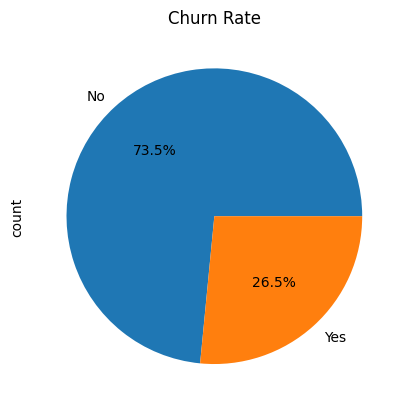

In [29]:
telco_df['Churn'].value_counts().plot.pie(title='Churn Rate',autopct='%1.1f%%')

As we can see from the pie graph above, most of the customers do not infact cancell their subscriptions

We will now conduct a data analysis into all of the independant variables.Firstly we will look inot the dofferent demgraphics vs the churn rate.

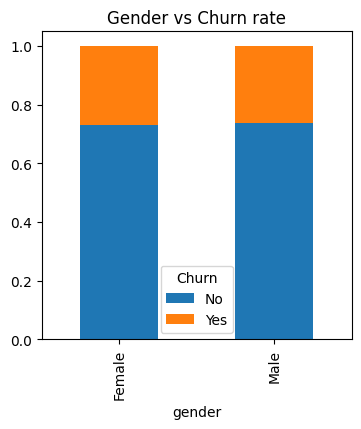

In [30]:
Gender=pd.crosstab(telco_df['gender'],telco_df['Churn'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Gender vs Churn rate')
plt.show()
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])


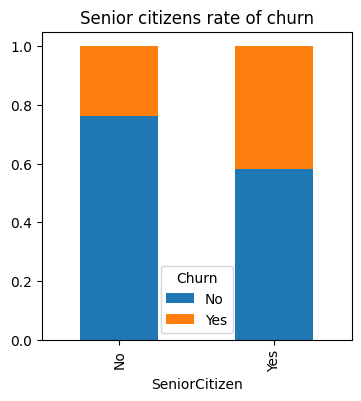

In [42]:
telco_df.loc[telco_df.SeniorCitizen==0,'SeniorCitizen'] = "No"  
telco_df.loc[telco_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])
SeniorCitizen.div(SeniorCitizen.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Senior citizens rate of churn')
plt.show()

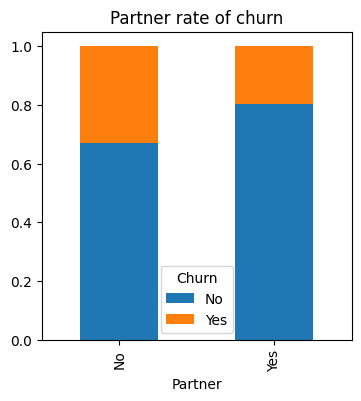

In [45]:
Partner=pd.crosstab(telco_df['Partner'],telco_df['Churn'])
Partner.div(Partner.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Partner rate of churn')
plt.show()

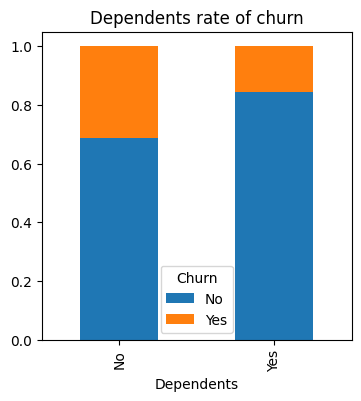

In [48]:
Dependents=pd.crosstab(telco_df['Dependents'],telco_df['Churn'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Dependents rate of churn')
plt.show()

From our analysis into the diffenrent demographics we can see